## <center>ANN Customer Churn prediction</center>


**The DataSet context is the following:** 

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

### Data exploration

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Neural Networks/Data Sets/TensorFlow/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns="customerID", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
filt = df["TotalCharges"] == ' '
empty_index = df["TotalCharges"][filt].index

df.drop(index=empty_index, inplace=True)

df["TotalCharges"] = df["TotalCharges"].apply(lambda x: float(x))

<Figure size 720x720 with 0 Axes>

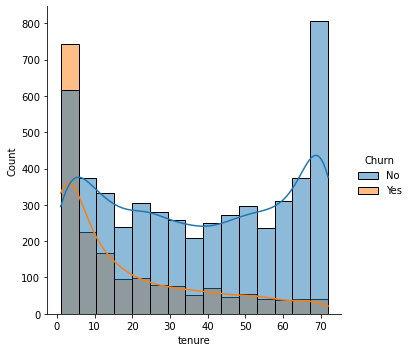

In [5]:
plt.figure(figsize=(10,10))
sns.displot(data=df, x="tenure", hue="Churn", kde=True);

<Figure size 720x720 with 0 Axes>

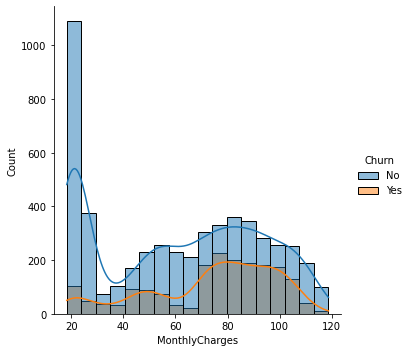

In [6]:
plt.figure(figsize=(10,10))
sns.displot(data=df, x="MonthlyCharges", hue="Churn", kde=True);

In [7]:
columns = df.columns

for col in columns:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [8]:
df.replace('No phone service', "No", inplace=True)
df.replace('No internet service', "No", inplace=True)


In [9]:
for col in columns:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [10]:
my_map = {
    "Yes": 1,
    "No": 0
}

yes_no_cols = df.select_dtypes("object").drop(columns=["gender", "InternetService", "Contract", "PaymentMethod"]).columns

for c in yes_no_cols:
    df[c] = df[c].map(my_map)


In [11]:
df["gender"].replace({"Female": 0, "Male":1}, inplace=True)

In [12]:
df1 = pd.get_dummies(df, drop_first=True)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


### Train Test Split and Scale

In [13]:
X = df1.drop(columns="Churn").values
y = df1["Churn"].values 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [16]:
def ANN(X_train, y_train, X_test, y_test, weights=None):
    size = X_train.shape[1]

    model = Sequential([
        Dense(size, activation="relu"),
        Dense(units=1,activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          batch_size=256,
          class_weight=weights)
    
    predictions = (model.predict(X_test) > 0.5).astype("int32")

    return predictions


predictions = ANN(X_train, y_train, X_test, y_test, weights=None)


Epoch 1/100
22/22 [==============================] - 1s 16ms/step - loss: 0.6747 - accuracy: 0.5719 - val_loss: 0.5966 - val_accuracy: 0.7399
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5740 - accuracy: 0.7300 - val_loss: 0.5395 - val_accuracy: 0.7505
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7330 - val_loss: 0.5077 - val_accuracy: 0.7612
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5025 - accuracy: 0.7477 - val_loss: 0.4826 - val_accuracy: 0.7811
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7687 - val_loss: 0.4639 - val_accuracy: 0.7804
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7781 - val_loss: 0.4515 - val_accuracy: 0.7946
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.7836 - val_loss: 0.4433 - val_accuracy: 0.7960
Epoch 8/100


#### Evaluating Model Performance.

In [17]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1052
           1       0.63      0.53      0.58       355

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.80      0.80      0.80      1407

[[943 109]
 [166 189]]


From the results, it can be noticed that the class 1 has a low F1 score, suggesting an unbalnaced dataset! 

### Mitigating Skewdness of Data

#### 1. Adjusting the weights

In [18]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

print(f"""Class 0: {count_class_0}
Class 1: {count_class_1}
Ratio: {count_class_0/count_class_1}""")


Class 0: 5163
Class 1: 1869
Ratio: 2.7624398073836276


Noticing there is a ratio of 1:2.8 between 0:1, the weights will get adjusted

In [19]:
predictions = ANN(X_train, y_train, X_test, y_test, weights={0: 1, 1: 2.8})

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 1.0667 - accuracy: 0.5445 - val_loss: 0.6485 - val_accuracy: 0.6304
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9711 - accuracy: 0.6428 - val_loss: 0.6015 - val_accuracy: 0.7029
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8993 - accuracy: 0.6958 - val_loss: 0.5737 - val_accuracy: 0.7271
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8440 - accuracy: 0.7223 - val_loss: 0.5427 - val_accuracy: 0.7356
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8067 - accuracy: 0.7383 - val_loss: 0.5307 - val_accuracy: 0.7392
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7817 - accuracy: 0.7488 - val_loss: 0.5148 - val_accuracy: 0.7477
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.7467 - val_loss: 0.5185 - val_accuracy: 0.7420
Epoch 8/100


In [20]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1052
           1       0.50      0.77      0.61       355

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.75      0.76      1407

[[782 270]
 [ 83 272]]


From the result it can be noticed that in the confusion matrix less values are misplaced for class 1 and more values are misplaced for class 0, showing a trade off.

#### 2. Undersampling


In [21]:
# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]


# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3707,1,0,1,1,69,1,0,0,0,0,...,19.90,1356.70,0,0,1,0,1,0,0,0
2352,1,0,0,0,8,1,0,0,0,0,...,19.70,168.90,0,0,1,0,0,0,0,0
4745,0,0,1,0,34,1,1,0,0,1,...,100.45,3414.65,0,1,0,0,0,0,1,0
6208,1,0,1,0,61,1,1,1,1,1,...,80.80,4860.85,0,0,0,0,1,0,0,0
86,0,0,1,0,35,1,0,1,0,0,...,62.15,2215.45,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,0,0,1,0,0,1,0
7026,0,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,0,0,0,0,0,0,0
7032,1,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,1,0,0,0,0,1,0
7034,0,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,1,0,0,0,1,0,0


In [22]:
print('Random under-sampling:')
print(df_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [23]:
X = df_under.drop('Churn',axis='columns')
y = df_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) 

In [24]:
predictions = ANN(X_train, y_train, X_test, y_test, weights=None)

Epoch 1/100
12/12 [==============================] - 1s 45ms/step - loss: 251.6011 - accuracy: 0.5000 - val_loss: 186.7665 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 162.5669 - accuracy: 0.5000 - val_loss: 103.4698 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 72.4408 - accuracy: 0.4716 - val_loss: 22.3601 - val_accuracy: 0.3342
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 15.1707 - accuracy: 0.4331 - val_loss: 20.4504 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 15.5752 - accuracy: 0.5003 - val_loss: 4.7525 - val_accuracy: 0.5428
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 5.2741 - accuracy: 0.4538 - val_loss: 3.0658 - val_accuracy: 0.5949
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 2.4126 - accuracy: 0.5977 - val_loss: 1.5490 - val_accuracy: 0.6751

In [25]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       374
           1       0.78      0.66      0.71       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.73       748
weighted avg       0.74      0.74      0.73       748

[[305  69]
 [129 245]]


There is a clear trade off in the F1 scores, improving the one of class 1 and reducing the one of class 0.

#### 3. Oversampling

In [26]:
# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]


# Undersample 0-class and concat the DataFrames of both class
df_class_1_up = df_class_1.sample(count_class_0, replace=True)
df_up = pd.concat([df_class_0, df_class_1_up], axis=0)
df_up

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0,1,1,0,34,1,1,0,1,1,...,94.25,3217.55,1,1,0,0,0,0,1,0
4856,0,0,1,1,31,1,1,0,1,0,...,91.15,2995.45,1,1,0,0,0,0,1,0
4149,1,0,1,0,71,0,0,0,1,0,...,49.35,3515.25,1,0,0,0,1,0,1,0
1327,1,0,1,0,59,1,1,0,0,1,...,99.50,5961.10,1,1,0,1,0,0,0,0


In [27]:
print('Random over-sampling:')
print(df_up.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [28]:
X = df_up.drop('Churn',axis='columns')
y = df_up['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) 

In [29]:
predictions = ANN(X_train, y_train, X_test, y_test, weights=None)

Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 355.4727 - accuracy: 0.5000 - val_loss: 290.8560 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 229.0171 - accuracy: 0.4703 - val_loss: 174.9963 - val_accuracy: 0.4652
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 122.6245 - accuracy: 0.4192 - val_loss: 72.7396 - val_accuracy: 0.4356
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 31.4720 - accuracy: 0.4431 - val_loss: 1.7695 - val_accuracy: 0.6012
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.8904 - accuracy: 0.6067 - val_loss: 0.6989 - val_accuracy: 0.6970
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6930 - val_loss: 0.5901 - val_accuracy: 0.7183
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.7301 - val_loss: 0.5550 - val_accuracy: 0.7391


In [30]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1033
           1       0.79      0.74      0.76      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

[[826 207]
 [267 766]]


#### 4. SMOTE


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
predictions = ANN(X_train, y_train, X_test, y_test, weights=None)

Epoch 1/100
33/33 [==============================] - 1s 12ms/step - loss: 94.7653 - accuracy: 0.5189 - val_loss: 14.1437 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 6.2150 - accuracy: 0.5872 - val_loss: 2.8729 - val_accuracy: 0.4913
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 1.9234 - accuracy: 0.5835 - val_loss: 1.3295 - val_accuracy: 0.5169
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 1.0726 - accuracy: 0.6059 - val_loss: 1.0006 - val_accuracy: 0.6694
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.7324 - accuracy: 0.6746 - val_loss: 0.7558 - val_accuracy: 0.6791
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.6812 - val_loss: 0.5181 - val_accuracy: 0.7314
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7223 - val_loss: 0.5091 - val_accuracy: 0.7420
Epoch 8/10

In [34]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73      1033
           1       0.71      0.88      0.79      1033

    accuracy                           0.76      2066
   macro avg       0.78      0.76      0.76      2066
weighted avg       0.78      0.76      0.76      2066

[[660 373]
 [123 910]]
